In [4]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import plot_model

In [5]:
#Get the Dataset
df=pd.read_csv('/content/MSFT.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

<ipython-input-5-5ecb13758e90>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df=pd.read_csv('/content/MSFT.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


checking the null values

In [9]:
#Print the shape of Dataframe  and Check for Null Values
print('Dataframe Shape: ', df.shape)
print(' Null Value Present: ', df.isnull().values.any())

Dataframe Shape:  (9083, 6)
 Null Value Present:  False


Plotting the true adjusted plot value

In [16]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


<Axes: xlabel='Date'>

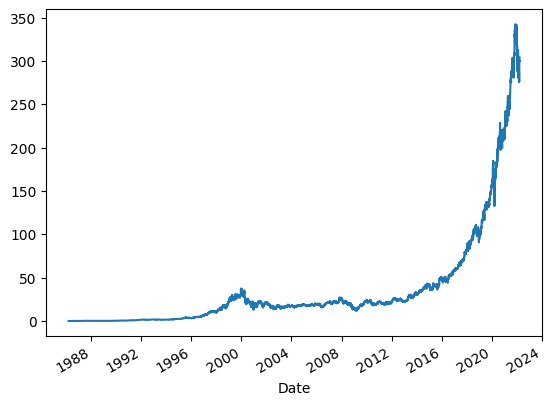

In [17]:
df['Adj Close'].plot()

Setting the Target Variable and Selecting the Features

In [18]:
#Set Target Variable
output_var = PD.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low',  'Volume']

scaling


In [19]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
1986-03-13,0.000000,0.000027,0.000000,1.000000
1986-03-14,0.000025,0.000030,0.000025,0.297096
1986-03-17,0.000035,0.000032,0.000036,0.127119
1986-03-18,0.000040,0.000032,0.000030,0.063588
1986-03-19,0.000033,0.000025,0.000025,0.044285


 Creating a Training Set and a Test Set for Stock Market Prediction

In [20]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

 Data Processing For LSTM

In [21]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

Building the LSTM Model for Stock Market Prediction

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


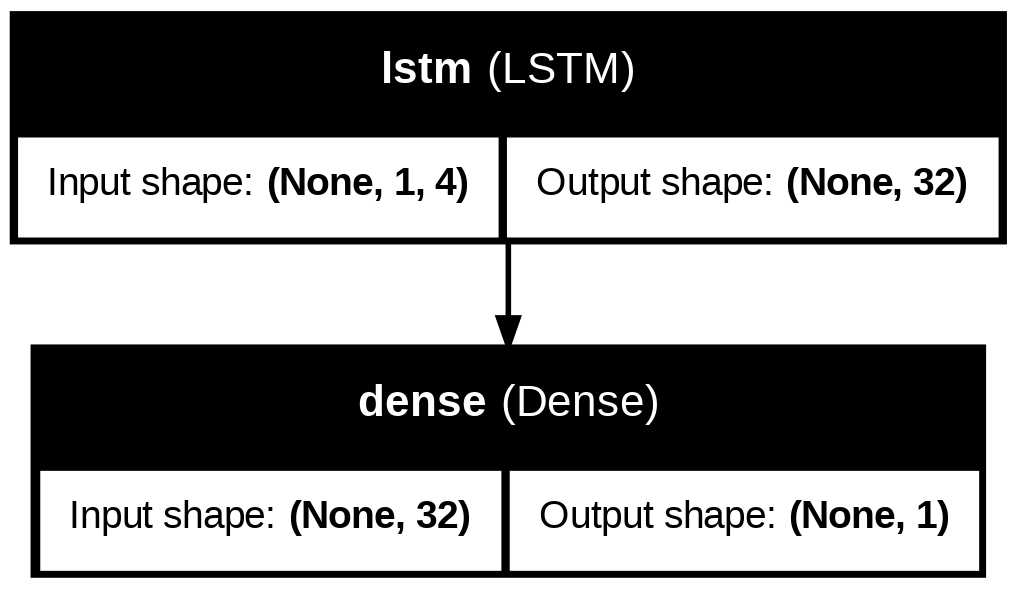

In [24]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

Training the Stock Market Prediction Model

In [25]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 17.5273
Epoch 2/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 448.7438
Epoch 3/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 264.6987
Epoch 4/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 147.0448
Epoch 5/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 73.6223
Epoch 6/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 27.9785
Epoch 7/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 8.9615
Epoch 8/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.6088
Epoch 9/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.9642
Epoch 10/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2527
Epoch 11/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.9084
Epoch 12/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7526
Epoch 13/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6884
Epoch 14/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6623
Epoch 

Making the LSTM Prediction

In [26]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


Comparing Predicted vs True Adjusted Close Value – LSTM

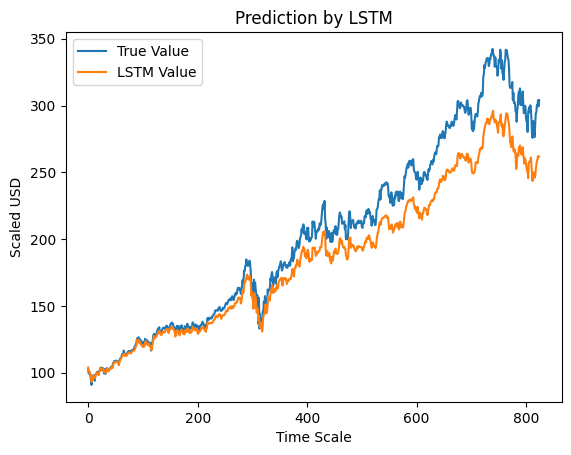

In [27]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()